HEART ATTACK PREDICTION USING LINEAR REGRESSION 

In [4]:
#IMPORTING THE PACKAGES

%matplotlib inline
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#LOADING THE DATASET

A = pd.read_csv(r"C:\Users\tmvis\Downloads\heart_failure_clinical_records_dataset (1).csv")

In [6]:
#DATASET HEAD

A.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
#DATASET INFO
A.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
#DATASET COLUMNS

A.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
#DATASET DESCRIBE

A.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:xlabel='smoking', ylabel='count'>

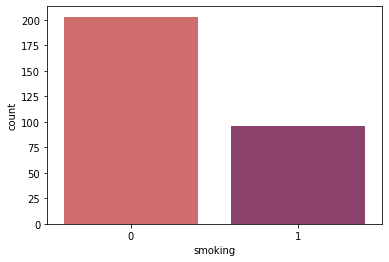

In [10]:
#COUNT PLOT 

sns.countplot(data = A, x = 'smoking', palette = 'flare')

In [11]:
#CALCULATE THE 

A.groupby('DEATH_EVENT')["smoking"].mean()

DEATH_EVENT
0    0.325123
1    0.312500
Name: smoking, dtype: float64

In [12]:
# CREATE THE FUNCTION THAT IMPUTES AVERAGE INTO MISSING VALUES

def impute_smoking(cols): 
    radius = cols[0]
    diagnosis = cols[1]
    if pd.isnull(radius):
        if diagnosis == 1: 
            return 0.31
        else:
            return 0.32
    else:
        return smoking

In [13]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
#BUILDING THE LOGISTICS REGRESSION MODEL

X = A.drop('DEATH_EVENT', axis = 1)
y = A['DEATH_EVENT']

In [15]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [17]:
#TRAINING AND TESTING THE DATA 

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [18]:
#TRAINING AND PREDICTING THE DATA 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predictions = logreg.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.94      0.85        53\n           1       0.88      0.59      0.71        37\n\n    accuracy                           0.80        90\n   macro avg       0.82      0.77      0.78        90\nweighted avg       0.81      0.80      0.79        90\n'

In [20]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[50,  3],
       [15, 22]], dtype=int64)

In [21]:
#ERROR RATE 

from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, predictions)
TP = matrix[0,0]
TN = matrix[1,1]
FP = matrix[0,1]
FN = matrix[1,0]

total = TP+TN+FP+FN
error_rate = float((FP+FN)/(total))
error_rate

0.2

Text(0.5, 257.44, 'Predicted label')

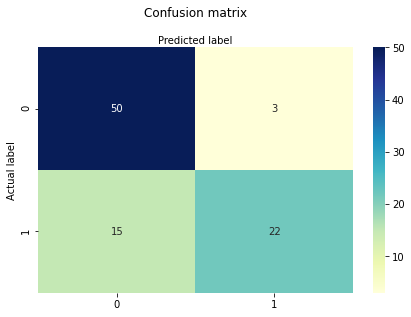

In [22]:
#VISUALIZATION HEATMAP 

class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange (len(class_names))
plt.xticks (tick_marks, class_names)
plt.yticks (tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame (matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')